# 🚗 Car Price Prediction

This notebook builds and evaluates Linear Regression and Lasso Regression models for predicting car prices.

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## Load Dataset

In [16]:

df = pd.read_csv("car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Preprocessing

In [17]:
df.shape

(301, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [20]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [21]:

df.replace({
    'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2},
    'Seller_Type': {'Dealer': 0, 'Individual': 1},
    'Transmission': {'Manual': 0, 'Automatic': 1}
}, inplace=True)


C:\Users\raivr\AppData\Local\Temp\ipykernel_44684\160500394.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


## Feature Selection

In [22]:

X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']


## Train Test Split

In [23]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Linear Regression

In [24]:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

print("Train R2:", r2_score(y_train, y_train_pred_lr))
print("Test R2:", r2_score(y_test, y_test_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_test_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))


Train R2: 0.8839793496750801
Test R2: 0.8468053957654199
MAE: 1.2217615462341054
RMSE: 1.8785439185438502


## Lasso Regression

In [25]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

print("Train R2:", r2_score(y_train, y_train_pred_lasso))
print("Test R2:", r2_score(y_test, y_test_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_test_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))


Train R2: 0.8821384238526544
Test R2: 0.8408241102550837
MAE: 1.2312479443133606
RMSE: 1.9148654422207891


## Visualization

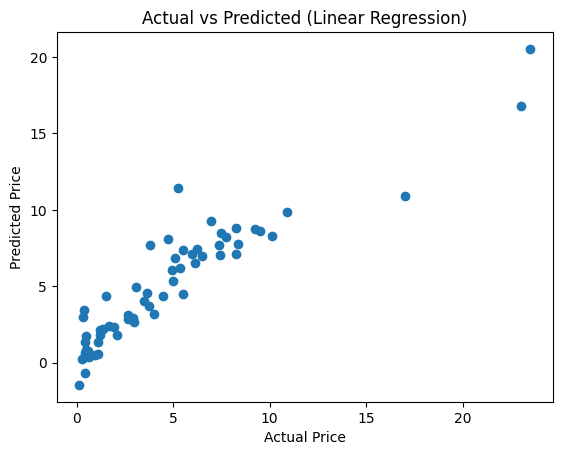

In [26]:

plt.scatter(y_test, y_test_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()
